# Programming Tutorial- Single LIF Neuron
[Instructions](http://faculty.fiu.edu/~fasoto/courses/COMPNEURO/slides/PT02-LIF-neuron.pdf)

In [1]:
%matplotlib inline
import numpy as np
import brian2 as br
import pylab as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_palette("bright")

In [2]:
# Start scope for brian2 simulation
br.start_scope()

In [3]:
# Define parameters of the LIF model
R = 100 * br.Mohm  # membrane resistance
tau = 10 * br.ms  # membrane time constant
thr = -50 * br.mV  # spike threshold
u_rest = -65 * br.mV  # resting potential
u_r = -70 * br.mV  # reset potential

In [4]:
# Create stimulation timeseries
# I = 200pA, between 101 ms and 500 ms
tmp = np.zeros((1000,))
tmp[100:500] = 200

input_current = br.TimedArray(tmp*br.pamp, dt=1*br.ms)

In [5]:
# Define equation for the LIF model
eqs = '''
du/dt = ( -(u - u_rest) + R*I ) / tau : volt
I = input_current(t) : amp
'''

In [6]:
LIF = br.NeuronGroup(N=1, model=eqs, method="linear", threshold='u>thr', reset='u=u_r')

In [7]:
LIF.u = u_rest
rec = br.StateMonitor(LIF, 'u', record=True)
rec_sp = br.SpikeMonitor(LIF)
print("{0} spikes detected.".format(rec_sp.count[0]))

0 spikes detected.


In [8]:
br.run(1*br.second)

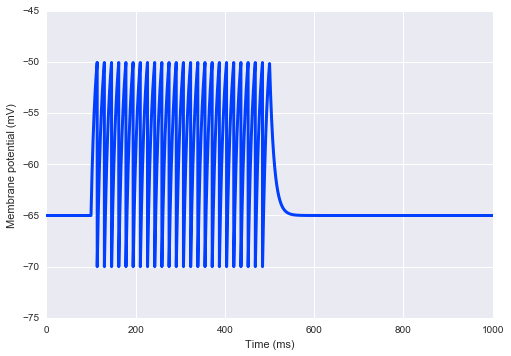

In [9]:
fig, ax = plt.subplots()
ax.plot(rec.t/br.ms, rec.u[0]*1000, label="State", lw=3.)
ax.set_ylim((-75, -45))
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Membrane potential (mV)')
plt.show(fig)

In [10]:
print("{0} spikes detected.".format(rec_sp.count[0]))

24 spikes detected.


In [11]:
def run_neuron(R, tau, thr, u_rest, u_r, eqs, tmp):
    br.start_scope()
    input_current = br.TimedArray(tmp*br.pamp, dt=1*br.ms)
    LIF = br.NeuronGroup(N=1, model=eqs, method="euler", threshold='u>thr', reset='u=u_r')
    LIF.u = u_rest
    rec = br.StateMonitor(LIF, 'u', record=True)
    br.run(1*br.second)
    fig, ax = plt.subplots()
    ax.plot(rec.t/br.ms, rec.u[0]*1000, label="State", lw=3.)
    ax.set_ylim((-75, -45))
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Membrane potential (mV)')
    plt.show(fig)

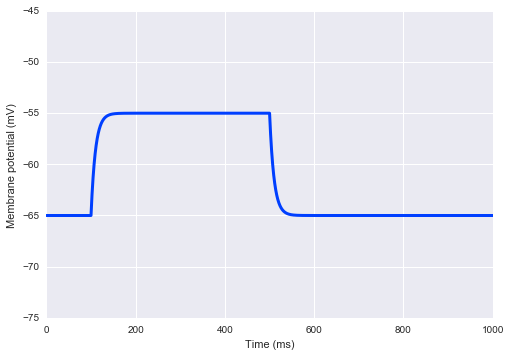

In [12]:
# Input = 100 pA
temp = np.zeros((1000,))
temp[100:500] = 100

run_neuron(R, tau, thr, u_rest, u_r, eqs, temp)

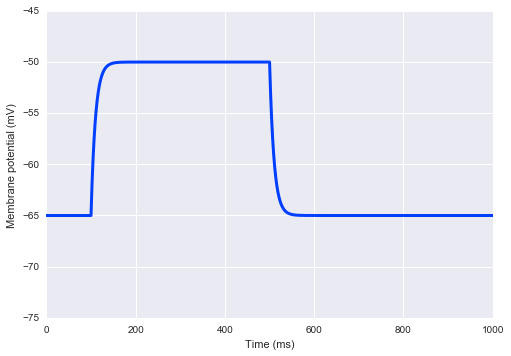

In [13]:
# Input = 150 pA
temp = np.zeros((1000,))
temp[100:500] = 150

run_neuron(R, tau, thr, u_rest, u_r, eqs, temp)

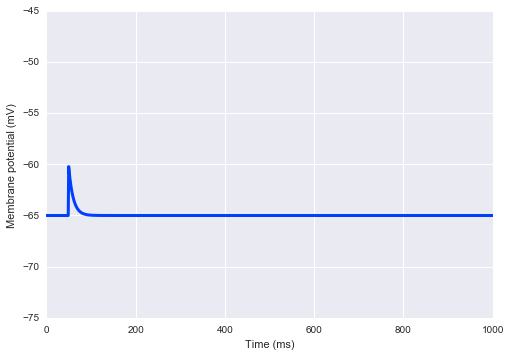

In [14]:
# Input = 500 pA, with one impulse at 50 ms with durations 1 ms
temp = np.zeros((1000,))
temp[49] = 500

run_neuron(R, tau, thr, u_rest, u_r, eqs, temp)

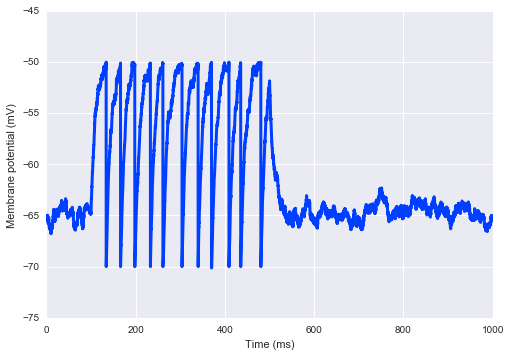

In [15]:
# Add noise
sigma = 1 * br.mvolt
eqs= '''
du/dt = ( -(u - u_rest) + R*I ) / tau + sigma*xi*tau**-0.5 : volt
I = input_current(t) : amp
'''

temp = np.zeros((1000,))
temp[100:500] = 150

run_neuron(R, tau, thr, u_rest, u_r, eqs, temp)

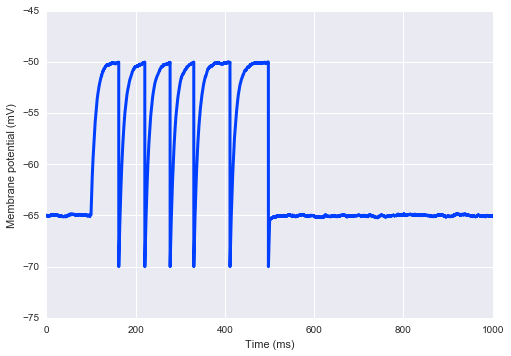

In [16]:
# Add noise
sigma = 0.1 * br.mvolt
eqs= '''
du/dt = ( -(u - u_rest) + R*I ) / tau + sigma*xi*tau**-0.5 : volt
I = input_current(t) : amp
'''

temp = np.zeros((1000,))
temp[100:500] = 150

run_neuron(R, tau, thr, u_rest, u_r, eqs, temp)